# Reproduce all our experiments with only one file ✨
This is a fast visualization of most of the results in our paper. Read our paper for more details.

### All-versus-all search on SCOPe40-test

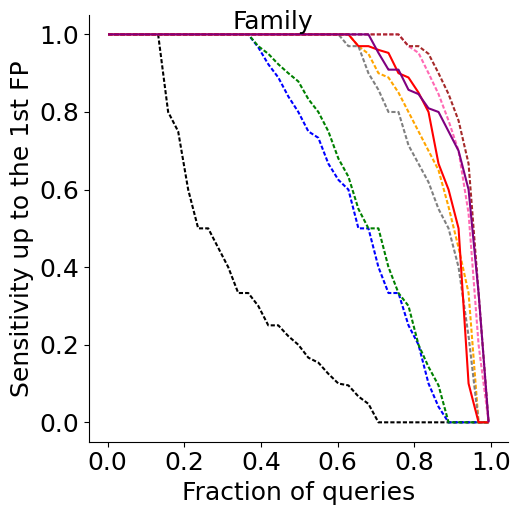

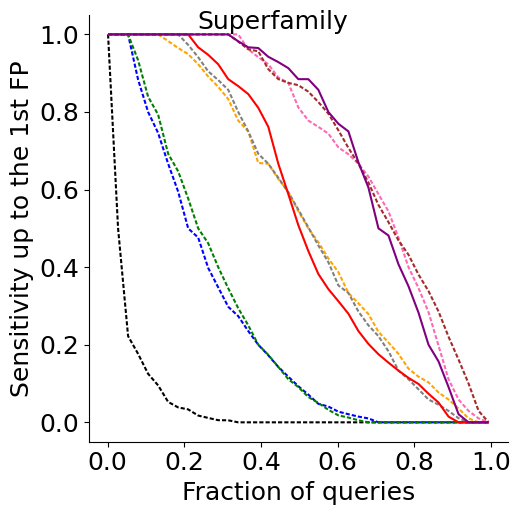

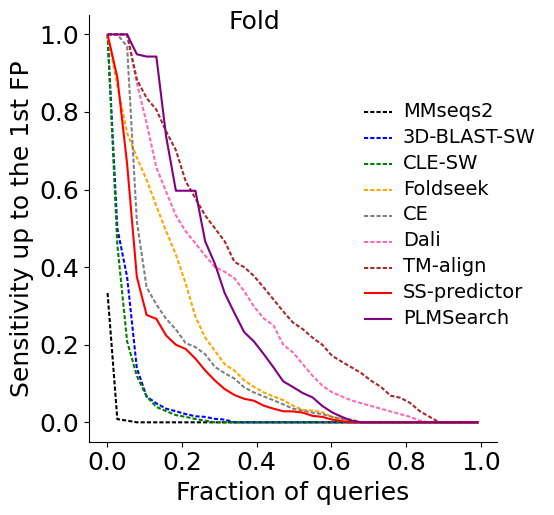

Get prefilter list without self: 53886it [00:00, 174313.16it/s]
100%|██████████| 51679/51679 [00:00<00:00, 808292.73it/s]


AUPR of MMseqs2:0.09072653458517645


Get prefilter list without self: 4859508it [00:32, 151087.91it/s]
100%|██████████| 4857305/4857305 [00:03<00:00, 1345527.49it/s]


AUPR of 3D-BLAST-SW:0.3375028276118216


Get prefilter list without self: 4870413it [00:31, 155676.36it/s]
100%|██████████| 4868206/4868206 [00:03<00:00, 1243154.82it/s]


AUPR of CLE-SW:0.24196832340646435


Get prefilter list without self: 399895it [00:02, 135044.26it/s]
100%|██████████| 397697/397697 [00:00<00:00, 1171889.83it/s]


AUPR of Foldseek:0.6272800039511435


Get prefilter list without self: 4870849it [00:32, 148634.12it/s]
100%|██████████| 4868642/4868642 [00:04<00:00, 1208405.88it/s]


AUPR of CE:0.6570705102636384


Get prefilter list without self: 236029it [00:01, 173626.33it/s]
100%|██████████| 233827/233827 [00:00<00:00, 1106695.66it/s]


AUPR of Dali:0.7882678236568267


Get prefilter list without self: 4870849it [00:34, 141082.79it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1322234.51it/s]


AUPR of Euclidean:0.13317750719981428


Get prefilter list without self: 4870849it [00:35, 136626.17it/s]
100%|██████████| 4868642/4868642 [00:04<00:00, 1211744.88it/s]


AUPR of COS:0.15771983454247424


Get prefilter list without self: 4870849it [00:37, 131557.69it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1259769.86it/s]


AUPR of SS-predictor (w/o COS):0.5075074053820329


Get prefilter list without self: 4870849it [00:35, 137710.22it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1313465.30it/s]


AUPR of SS-predictor:0.5237483522955546


Get prefilter list without self: 837769it [00:06, 136705.71it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1283130.80it/s]


AUPR of PLMSearch:0.577114656148691


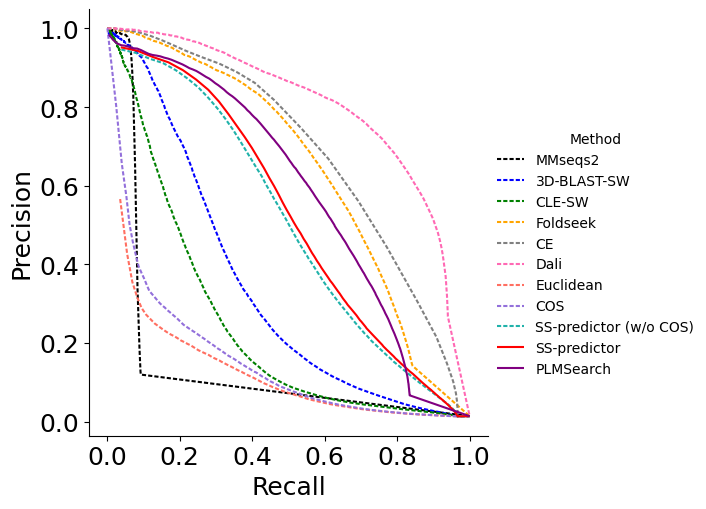

Get prefilter list without self: 53886it [00:00, 115236.44it/s]
100%|██████████| 51679/51679 [00:00<00:00, 961917.10it/s]


MAP of MMseqs2:0.16121117185923362
P@10 of MMseqs2:0.23235160851835202
Good query = 2207


Get prefilter list without self: 4859508it [00:31, 152461.55it/s]
100%|██████████| 4857305/4857305 [00:03<00:00, 1350947.50it/s]


MAP of 3D-BLAST-SW:0.4731570077222993
P@10 of 3D-BLAST-SW:0.5215677390122344
Good query = 2207


Get prefilter list without self: 4870413it [00:31, 154696.03it/s]
100%|██████████| 4868206/4868206 [00:03<00:00, 1254517.47it/s]


MAP of CLE-SW:0.4747295999688263
P@10 of CLE-SW:0.5180788400543725
Good query = 2207


Get prefilter list without self: 399895it [00:02, 155640.11it/s]
100%|██████████| 397697/397697 [00:00<00:00, 1044563.32it/s]


MAP of Foldseek:0.6179499396633631
P@10 of Foldseek:0.6237879474399637
Good query = 2207


Get prefilter list without self: 4870849it [00:31, 154682.21it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1308194.02it/s]


MAP of CE:0.63032851754059
P@10 of CE:0.6367014046216573
Good query = 2207


Get prefilter list without self: 236029it [00:01, 175337.12it/s]
100%|██████████| 233827/233827 [00:00<00:00, 1159296.34it/s]


MAP of Dali:0.7268833222255731
P@10 of Dali:0.6875396465790664
Good query = 2207


Get prefilter list without self: 4870849it [00:35, 138993.01it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1306572.29it/s]


MAP of Euclidean:0.38357814736138024
P@10 of Euclidean:0.4954236520163129
Good query = 2207


Get prefilter list without self: 4870849it [00:36, 135119.68it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1306542.44it/s]


MAP of COS:0.3871944438822754
P@10 of COS:0.4990031717263258
Good query = 2207


Get prefilter list without self: 4870849it [00:36, 132266.20it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1296430.36it/s]


MAP of SS-predictor (w/o COS):0.5547756864272843
P@10 of SS-predictor (w/o COS):0.5859537834164033
Good query = 2207


Get prefilter list without self: 4870849it [00:37, 129478.90it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1290398.70it/s]


MAP of SS-predictor:0.5614879703148047
P@10 of SS-predictor:0.5934299954689628
Good query = 2207


Get prefilter list without self: 837769it [00:05, 140090.59it/s]
100%|██████████| 835562/835562 [00:00<00:00, 1276905.43it/s]


MAP of PLMSearch:0.5858888480023234
P@10 of PLMSearch:0.6124150430448567
Good query = 2207


In [2]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, scop_roc, tmscore_aupr, tmscore_precision_recall

# All-versus-all search on SCOPe40-test
alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["mmseqs2.rocx", "3dblastsw.rocx", "clesw.rocx", "foldseek.rocx", "cealn.rocx", "dalialn.rocx", "tmaln.rocx", "ss_predictor.rocx", "plmsearch.rocx"]
roc_plot_name = "./scientist_figures/scop_roc"
methods_name_list = ["MMseqs2", "3D-BLAST-SW", "CLE-SW", "Foldseek", "CE", "Dali", "TM-align", "SS-predictor", "PLMSearch"]
line_style = [(2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (1,0), (1,0)]
color_dict = {
    "MMseqs2": "black",
    "3D-BLAST-SW": "blue",
    "CLE-SW": "green",
    "Foldseek": "orange",
    "CE": "gray",
    "Dali": "#FF69B4",
    "TM-align": "brown",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
scop_roc(alnresult_dir, methods_filename_list, roc_plot_name, methods_name_list, line_style, color_dict)

# Evaluation based on TM-score benchmark(Metrics for evaluating different search methods) on SCOPe40-test
todo_dir_list = ["./plmsearch_data/scope_test/prefilter_result/"]
ss_mat_path = "./plmsearch_data/scope_test/ss_mat.npy"
protein_list_path = "./plmsearch_data/scope_test/protein_list.txt"
todo_name_list = [
    "mmseqs2", 
    "3dblastsw", 
    "clesw",
    "foldseek",
    "cealn", 
    "dalialn", 
    "mse", 
    "cos", 
    "ss_predictor_without_cos", 
    "ss_predictor", 
    "plmsearch"
]
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
method_list = ["MMseqs2", "3D-BLAST-SW", "CLE-SW", "Foldseek", "CE", "Dali", "Euclidean", "COS", "SS-predictor (w/o COS)", "SS-predictor", "PLMSearch"]
line_style = [(2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (1,0), (1,0)]
color_dict = {
    "MMseqs2": "black",
    "3D-BLAST-SW": "blue",
    "CLE-SW": "green",
    "Foldseek": "orange",
    "CE": "gray",
    "Dali": "#FF69B4",
    "Euclidean": "#ff6f61",
    "COS": "#9370DB",
    "SS-predictor (w/o COS)": "#20B2AA",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
tmscore_aupr(ss_mat_path, protein_list_path, protein_list_path, todo_file_list, "./scientist_figures/tmscore_aupr_scope", method_list, line_style, color_dict)
k = 10
tmscore_precision_recall(ss_mat_path, protein_list_path, protein_list_path, todo_file_list, method_list, k=k)

### Protein search with Swiss-Prot as target database


In [3]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, tmscore_aupr, tmscore_precision_recall

# Evaluation based on TM-score benchmark(Metrics for evaluating different search methods) on Swiss-Prot to Swiss-Prot
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/prefilter_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/target_protein_list.txt"
todo_name_list = [
    "mmseqs2", 
    "foldseek", 
    "mse", 
    "cos", 
    "ss_predictor_without_cos",
    "ss_predictor",
    "plmsearch"
]
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
method_list = ["MMseqs2", "Foldseek", "Euclidean", "COS", "SS-predictor (w/o COS)", "SS-predictor", "PLMSearch"]
tmscore_aupr(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, "./scientist_figures/tmscore_aupr_swissprot_to_swissprot", method_list, [], [])
k = 100
tmscore_precision_recall(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, method_list, k=k)

# Evaluation based on TM-score benchmark(Metrics for evaluating different search methods) on SCOPe40 to Swiss-Prot
todo_dir_list = ["./plmsearch_data/scope_to_swissprot/prefilter_result/"]
ss_mat_path = "./plmsearch_data/scope_to_swissprot/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/scope_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/scope_to_swissprot/target_protein_list.txt"
todo_name_list = [
    "mmseqs2", 
    "foldseek", 
    "mse", 
    "cos", 
    "ss_predictor_without_cos",
    "ss_predictor",
    "plmsearch"
]
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
method_list = ["MMseqs2", "Foldseek", "Euclidean", "COS", "SS-predictor (w/o COS)", "SS-predictor", "PLMSearch"]
tmscore_aupr(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, "./scientist_figures/tmscore_aupr_scope_to_swissprot", method_list, [], [])
k = 100
tmscore_precision_recall(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, method_list, k=k)

Get prefilter list without self: 5506it [00:00, 81524.45it/s]
100%|██████████| 5506/5506 [00:00<00:00, 345855.93it/s]


AUPR of MMseqs2:0.31351657963955193


Get prefilter list without self: 8123it [00:00, 123102.47it/s]
100%|██████████| 8123/8123 [00:00<00:00, 670003.17it/s]


AUPR of Foldseek:0.6308827942792062


Get prefilter list without self: 2493270it [00:17, 144289.01it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 737304.74it/s]


AUPR of Euclidean:0.3293233750736519


Get prefilter list without self: 2493270it [00:18, 136308.33it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 735995.43it/s]


AUPR of COS:0.33292476493477946


Get prefilter list without self: 2493270it [00:17, 143556.91it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 742036.82it/s]


AUPR of SS-predictor (w/o COS):0.796352699740959


Get prefilter list without self: 2493270it [00:17, 142532.15it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 714790.90it/s]


AUPR of SS-predictor:0.892627756547258


Get prefilter list without self: 19238it [00:00, 153101.24it/s]
100%|██████████| 19238/19238 [00:00<00:00, 649651.95it/s]


AUPR of PLMSearch:0.973910300974978


Get prefilter list without self: 5506it [00:00, 113439.19it/s]
100%|██████████| 5506/5506 [00:00<00:00, 260617.50it/s]


MAP of MMseqs2:0.42986120740098366
P@100 of MMseqs2:0.5619999999999999
Good query = 5


Get prefilter list without self: 8123it [00:00, 173243.96it/s]
100%|██████████| 8123/8123 [00:00<00:00, 312296.80it/s]


MAP of Foldseek:0.7080739893211673
P@100 of Foldseek:0.8099999999999999
Good query = 5


Get prefilter list without self: 2493270it [00:17, 143484.48it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 731960.57it/s]


MAP of Euclidean:0.47802381892815066
P@100 of Euclidean:0.698
Good query = 5


Get prefilter list without self: 2493270it [00:17, 140409.15it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 717826.87it/s]


MAP of COS:0.48257656824097106
P@100 of COS:0.708
Good query = 5


Get prefilter list without self: 2493270it [00:17, 143180.70it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 735836.75it/s]


MAP of SS-predictor (w/o COS):0.6748974947246444
P@100 of SS-predictor (w/o COS):0.732
Good query = 5


Get prefilter list without self: 2493270it [00:17, 141253.61it/s]
100%|██████████| 2493270/2493270 [00:03<00:00, 705398.14it/s]


MAP of SS-predictor:0.7830737273342812
P@100 of SS-predictor:0.868
Good query = 5


Get prefilter list without self: 19238it [00:00, 154396.09it/s]
100%|██████████| 19238/19238 [00:00<00:00, 452326.21it/s]


MAP of PLMSearch:0.8730026307380274
P@100 of PLMSearch:0.868
Good query = 5


Get prefilter list without self: 44676it [00:00, 152878.14it/s]
100%|██████████| 44676/44676 [00:00<00:00, 360579.91it/s]


AUPR of MMseqs2:0.08465174121473804


Get prefilter list without self: 38669it [00:00, 159097.01it/s]
100%|██████████| 38669/38669 [00:00<00:00, 390782.39it/s]


AUPR of Foldseek:0.30093930801862334


Get prefilter list without self: 24932700it [03:19, 124769.18it/s]
100%|██████████| 24932700/24932700 [00:36<00:00, 691941.97it/s]


AUPR of Euclidean:0.06097576089619058


Get prefilter list without self: 24932700it [04:13, 98427.55it/s] 
100%|██████████| 24932700/24932700 [00:36<00:00, 679540.37it/s]


AUPR of COS:0.07684762067816277


Get prefilter list without self: 24932700it [04:03, 102520.63it/s]
100%|██████████| 24932700/24932700 [00:43<00:00, 573300.45it/s]


AUPR of SS-predictor (w/o COS):0.24227741553653587


Get prefilter list without self: 24932700it [04:20, 95888.71it/s] 
100%|██████████| 24932700/24932700 [00:36<00:00, 675742.45it/s]


AUPR of SS-predictor:0.30159727686985205


Get prefilter list without self: 1208996it [00:13, 89971.50it/s] 
100%|██████████| 1208996/1208996 [00:01<00:00, 668929.82it/s]


AUPR of PLMSearch:0.43426707364466366


Get prefilter list without self: 44676it [00:00, 171695.06it/s]
100%|██████████| 44676/44676 [00:00<00:00, 364142.32it/s]


MAP of MMseqs2:0.189960090045035
P@100 of MMseqs2:0.35541666666666666
Good query = 48


Get prefilter list without self: 38669it [00:00, 176279.95it/s]
100%|██████████| 38669/38669 [00:00<00:00, 335096.13it/s]


MAP of Foldseek:0.422068674121938
P@100 of Foldseek:0.4925
Good query = 48


Get prefilter list without self: 24932700it [03:17, 126415.98it/s]
100%|██████████| 24932700/24932700 [00:35<00:00, 706375.22it/s]


MAP of Euclidean:0.3052935783828773
P@100 of Euclidean:0.42583333333333334
Good query = 48


Get prefilter list without self: 24932700it [04:17, 96932.56it/s] 
100%|██████████| 24932700/24932700 [00:37<00:00, 670625.06it/s]


MAP of COS:0.3090952254063734
P@100 of COS:0.4279166666666667
Good query = 48


Get prefilter list without self: 24932700it [04:12, 98792.21it/s] 
100%|██████████| 24932700/24932700 [00:36<00:00, 677591.79it/s]


MAP of SS-predictor (w/o COS):0.3801663331515294
P@100 of SS-predictor (w/o COS):0.44437499999999974
Good query = 48


Get prefilter list without self: 24932700it [04:28, 92987.13it/s] 
100%|██████████| 24932700/24932700 [00:37<00:00, 666562.83it/s]


MAP of SS-predictor:0.4630497558549011
P@100 of SS-predictor:0.5154166666666667
Good query = 48


Get prefilter list without self: 1208996it [00:13, 91195.78it/s] 
100%|██████████| 1208996/1208996 [00:01<00:00, 663221.07it/s]


MAP of PLMSearch:0.5010410683398172
P@100 of PLMSearch:0.5222916666666665
Good query = 48


### Ablation experiment1
Ablation experiment based on SCOPe benchmark on the SCOPe40-test

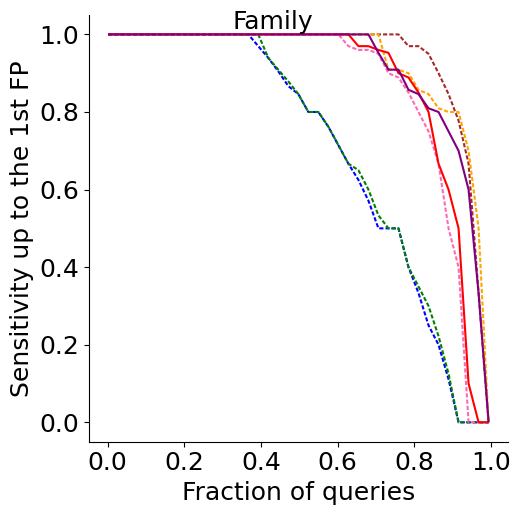

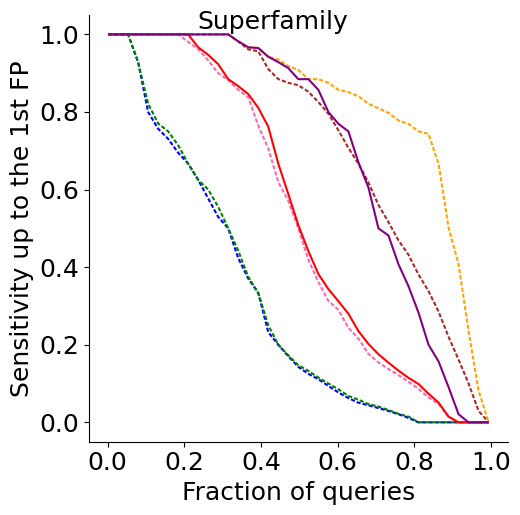

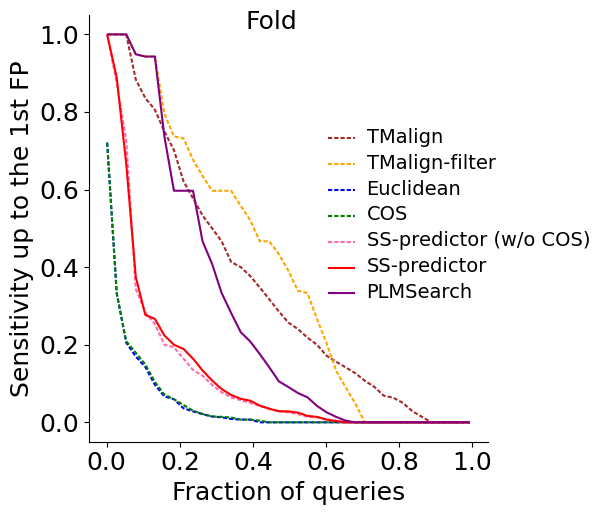

In [4]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import scop_roc

# Ablation1, scope roc
alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["tmaln.rocx", "tmaln_filter.rocx", "mse.rocx", "cos.rocx", "ss_predictor_without_cos.rocx", "ss_predictor.rocx", "plmsearch.rocx"]
roc_plot_name = "./scientist_figures/scop_roc_ablation"
methods_name_list = ["TMalign", "TMalign-filter", "Euclidean", "COS", "SS-predictor (w/o COS)", "SS-predictor", "PLMSearch"]
line_style = [(2,1), (2,1), (2,1), (2,1), (2,1), (1,0), (1,0)]
color_dict = {
    "TM-align": "brown",
    "TMalign-filter": "orange",
    "Euclidean": "blue",
    "COS": "green",
    "SS-predictor (w/o COS)": "#FF69B4",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
scop_roc(alnresult_dir, methods_filename_list, roc_plot_name, methods_name_list, line_style, color_dict)

### Ablation experiment2
Evaluation result based on TM-score benchmark(Metrics for evaluating different pre-filter methods)

Get prefilter list without self: 19238it [00:00, 164091.15it/s]


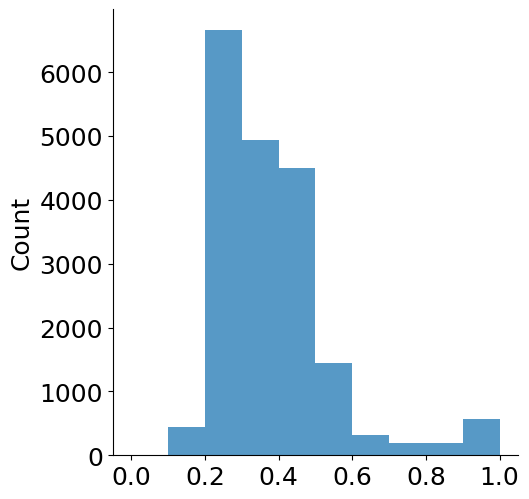

Get prefilter list without self: 2493270it [00:18, 136411.25it/s]


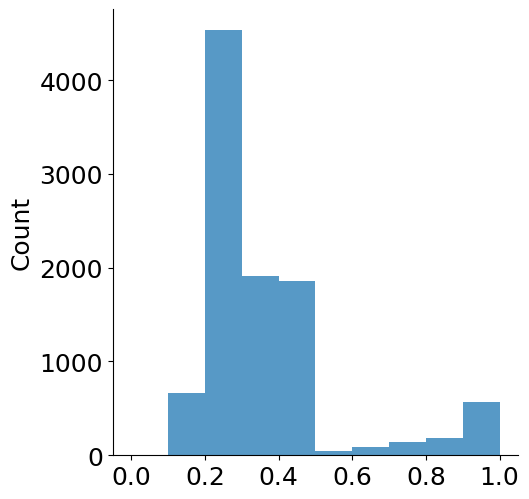

Get prefilter list without self: 2493270it [00:18, 133705.93it/s]


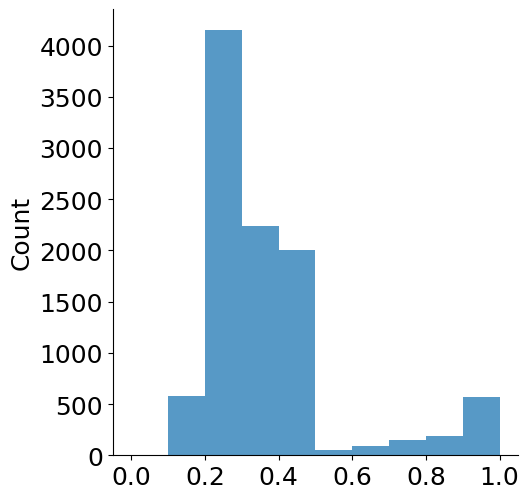

Get prefilter list without self: 2493270it [00:17, 140289.52it/s]


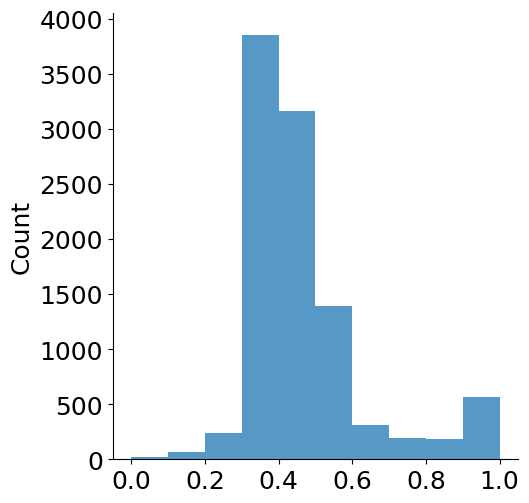

Get prefilter list without self: 2493270it [00:18, 133307.35it/s]


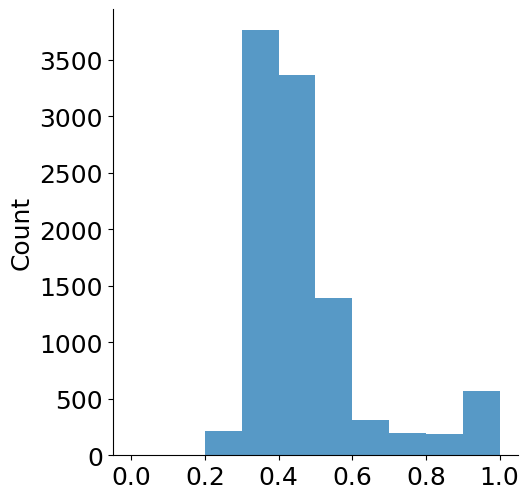

Get prefilter list without self: 19238it [00:00, 150848.69it/s]


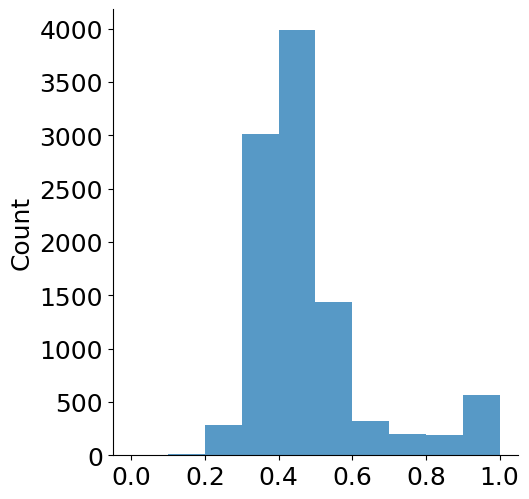

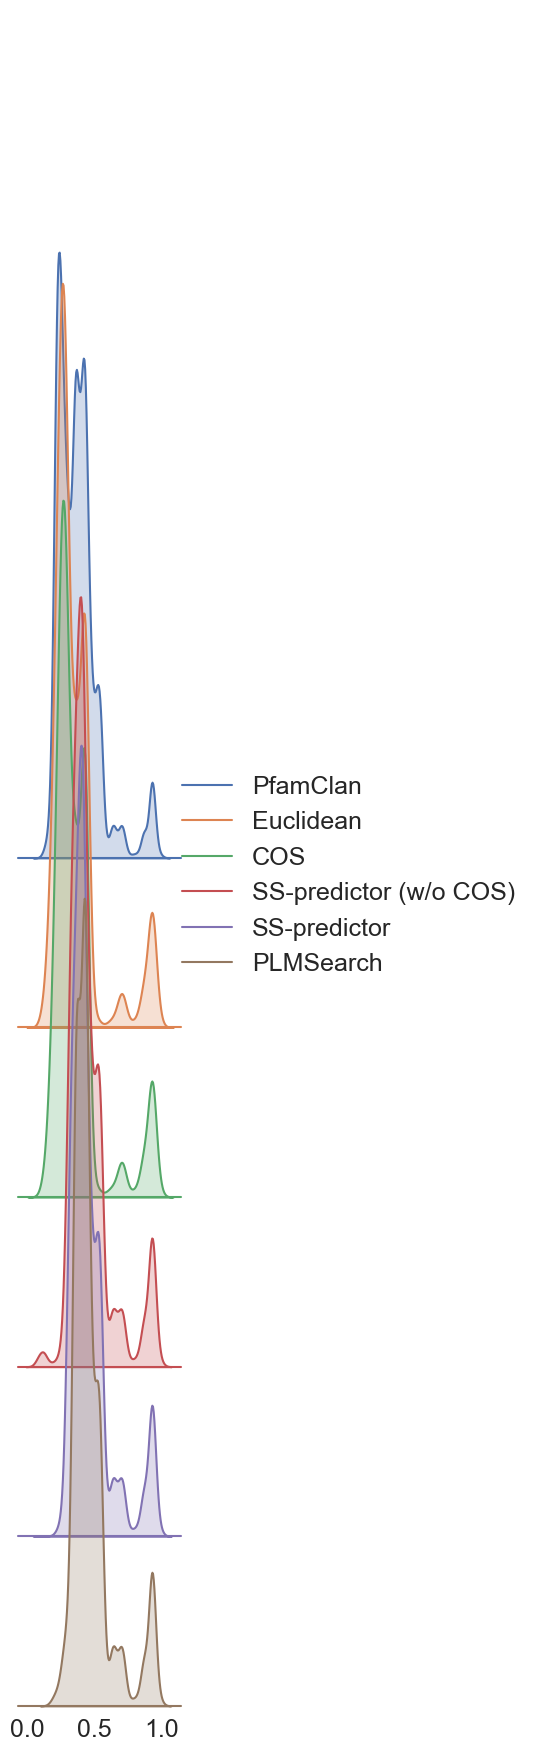

Get prefilter list without self: 19238it [00:00, 177367.99it/s]
100%|██████████| 19238/19238 [00:00<00:00, 1898365.38it/s]
Get prefilter list without self: 2493270it [00:17, 139270.91it/s]
100%|██████████| 10000/10000 [00:00<00:00, 2093801.92it/s]
Get prefilter list without self: 19238it [00:00, 152098.10it/s]
100%|██████████| 10000/10000 [00:00<00:00, 1707917.58it/s]


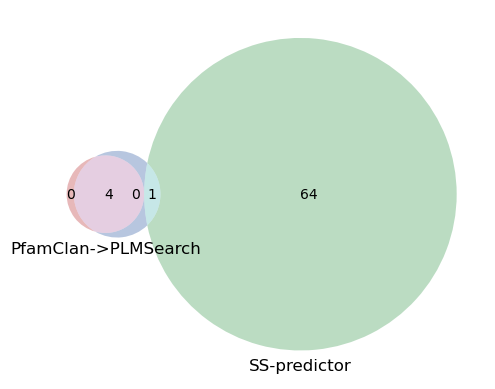

/home/lw/anaconda3/envs/ss_filter/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


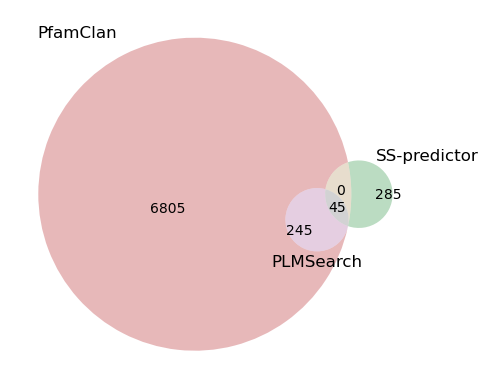

In [5]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, ss_mat_statistics, get_miss_wrong_statistics, venn_graph3

# Ablation2, Evaluation result based on TM-score benchmark(Metrics for evaluating different pre-filter methods)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/prefilter_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/target_protein_list.txt"
todo_name_list = [
    'pfamclan',
    'mse',
    'cos',
    'ss_predictor_without_cos',
    'ss_predictor',
    'plmsearch'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamClan', 'Euclidean', 'COS', 'SS-predictor (w/o COS)', 'SS-predictor', 'PLMSearch']
top_list = ['all', 10000, 10000, 10000, 10000, 10000]
ss_mat_statistics(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, todo_fig_list, "./scientist_figures/swissprot_to_swissprot/ablation/distribution.png", method_list, top_list, legend=True)

# Miss fault statistics(ablation)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/prefilter_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/target_protein_list.txt"
result_path = './scientist_figures/swissprot_to_swissprot/ablation/'
todo_name_list = [
    'pfamclan',
    'ss_predictor_without_cos',
    'plmsearch'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
top_list = ['all', 10000, 10000]
get_miss_wrong_statistics(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, top_list, result_path)

# Venn_graph3(ablation)
pfamclan_missed_filename = './scientist_figures/swissprot_to_swissprot/ablation/miss_pfamclan.txt'
ss_predictor_without_cos_missed_filename = './scientist_figures/swissprot_to_swissprot/ablation/miss_ss_predictor_without_cos.txt'
plmsearch_missed_filename = './scientist_figures/swissprot_to_swissprot/ablation/miss_plmsearch.txt'
venn_graph_name = './scientist_figures/swissprot_to_swissprot/ablation/venn_graph_miss.png'
venn_graph3([pfamclan_missed_filename, ss_predictor_without_cos_missed_filename, plmsearch_missed_filename], ('PfamClan->PLMSearch', 'SS-predictor', ''), venn_graph_name)

pfamclan_wrong_filename = './scientist_figures/swissprot_to_swissprot/ablation/wrong_pfamclan.txt'
ss_predictor_without_cos_wrong_filename = './scientist_figures/swissprot_to_swissprot/ablation/wrong_ss_predictor_without_cos.txt'
plmsearch_wrong_filename = './scientist_figures/swissprot_to_swissprot/ablation/wrong_plmsearch.txt'
venn_graph_name = './scientist_figures/swissprot_to_swissprot/ablation/venn_graph_wrong.png'
venn_graph3([pfamclan_wrong_filename, ss_predictor_without_cos_wrong_filename, plmsearch_wrong_filename], ('PfamClan', 'SS-predictor', 'PLMSearch'), venn_graph_name)

### Why SS-predictor performs better than Euclidean and COS?

**Notice: If `CPU ONLY`, change the settings as described below**

/home/lw/anaconda3/envs/ss_filter/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100000/100000 [00:07<00:00, 13079.60it/s]


Pearson correlation coefficient of mse = 0.469933805223371
Spearman correlation coefficient of mse = 0.46208724638183674


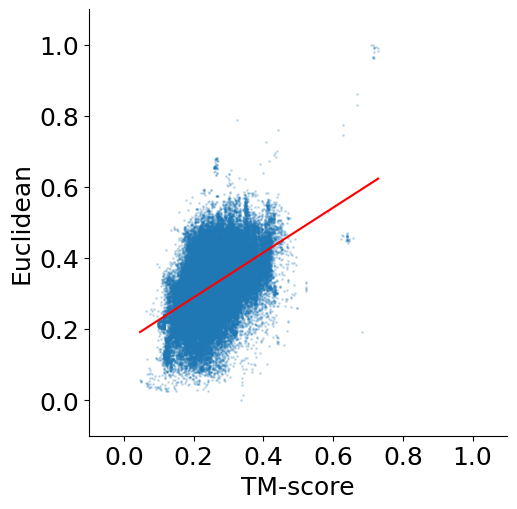

100%|██████████| 100000/100000 [00:05<00:00, 18874.29it/s]


Pearson correlation coefficient of cos = 0.4165214652050878
Spearman correlation coefficient of cos = 0.4623668027539799


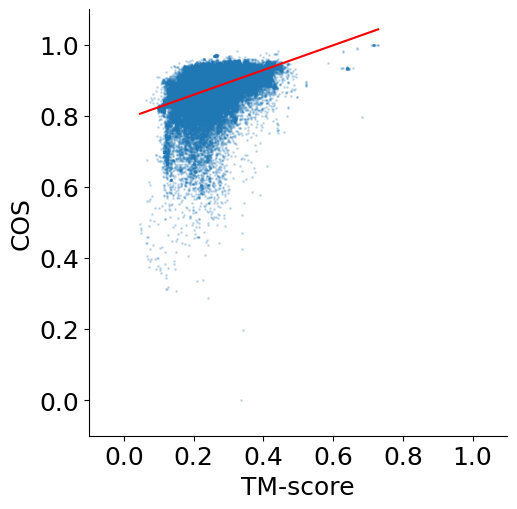

None of GPU is selected.


100%|██████████| 100000/100000 [02:25<00:00, 685.82it/s]


Pearson correlation coefficient of SS-predictor = 0.7584156442954103
Spearman correlation coefficient of SS-predictor = 0.7548455408762133


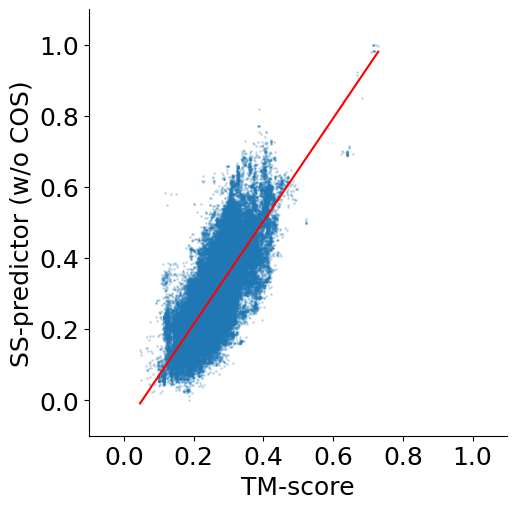

None of GPU is selected.


100%|██████████| 100000/100000 [02:50<00:00, 588.09it/s]


Pearson correlation coefficient of SS-predictor(COS) = 0.7621424797307677
Spearman correlation coefficient of SS-predictor(COS) = 0.7585336845174422


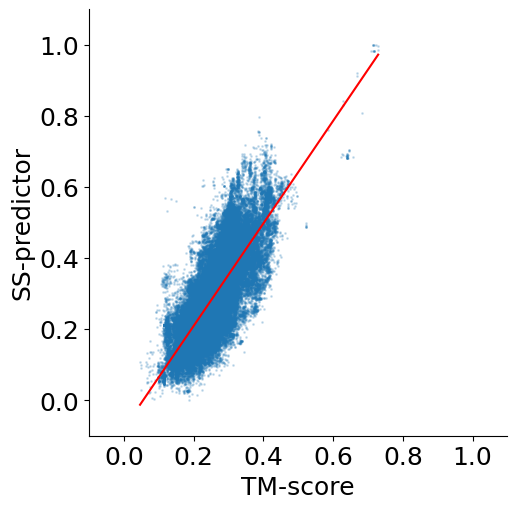

In [1]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import esm_similarity_statistics, ss_predictor_statistics

# ss_esm_similarity statistics(swissprot_to_swissprot)
# query_esm_filename = './plmsearch_data/swissprot_to_swissprot/query_mean_esm_result.pkl'
# target_esm_filename = './plmsearch_data/swissprot_to_swissprot/target_mean_esm_result.pkl'
# If cpu only
query_esm_filename = './plmsearch_data/swissprot_to_swissprot/query_mean_esm_result_cpu.pkl'
target_esm_filename = './plmsearch_data/swissprot_to_swissprot/target_mean_esm_result_cpu.pkl'

query_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/target_protein_list.txt"
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"

fig_name = f'./scientist_figures/correlation(Euclidean).png'
esm_similarity_statistics(query_esm_filename, target_esm_filename, query_protein_list_path, target_protein_list_path, ss_mat_path, fig_name, mode='mse')

fig_name = f'./scientist_figures/correlation(cos).png'
esm_similarity_statistics(query_esm_filename, target_esm_filename, query_protein_list_path, target_protein_list_path, ss_mat_path, fig_name, mode='cos')

# ss_predictor_score statistics(swissprot_to_swissprot)
save_model_path = './plmsearch_data/esm_ss_predict/model_scop_tri.sav'
#device_id = [0]
# If cpu only
device_id = [] 
fig_name = f'./scientist_figures/correlation(ss_predictor_without_cos).png'
ss_predictor_statistics(query_esm_filename, target_esm_filename, query_protein_list_path, target_protein_list_path, ss_mat_path, save_model_path, device_id, fig_name, cos = False)

save_model_path = './plmsearch_data/esm_ss_predict/model_scop_tri.sav'
#device_id = [0]
# If cpu only
device_id = []
fig_name = f'./scientist_figures/correlation(ss_predictor).png'
ss_predictor_statistics(query_esm_filename, target_esm_filename, query_protein_list_path, target_protein_list_path, ss_mat_path, save_model_path, device_id, fig_name, cos = True)

### Which pair is recalled? Which pair is missed?


/home/lw/anaconda3/envs/ss_filter/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Get prefilter list without self: 5506it [00:00, 175419.77it/s]
100%|██████████| 5506/5506 [00:00<00:00, 1926573.61it/s]
Get prefilter list without self: 8123it [00:00, 166240.53it/s]
100%|██████████| 5506/5506 [00:00<00:00, 2126112.85it/s]
Get prefilter list without self: 2493270it [00:28, 87899.82it/s]
100%|██████████| 5506/5506 [00:00<00:00, 1228395.63it/s]
Get prefilter list without self: 19238it [00:00, 97320.07it/s]
100%|██████████| 5506/5506 [00:00<00:00, 1180726.92it/s]


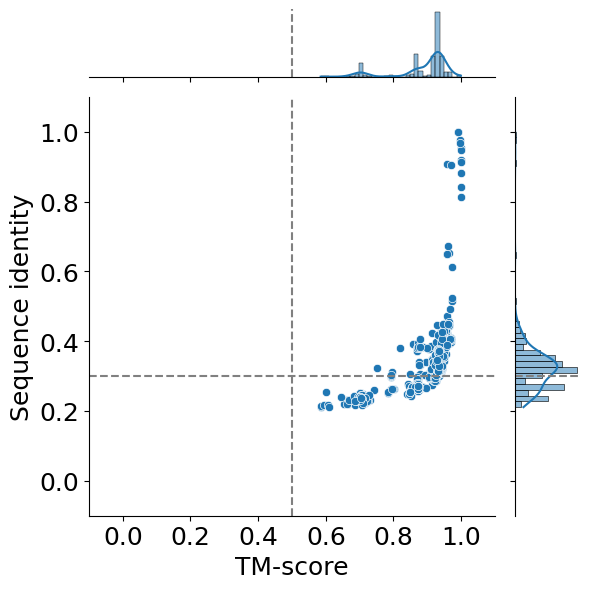

Statistics_result:
st1_se1_num=579/579
st1_se1_rate=1.0
st1_se0_num=276/2138
st1_se0_rate=0.12909260991580918
st1_num=855/2717
st1_rate=0.3146853146853147
---------------------------------------------


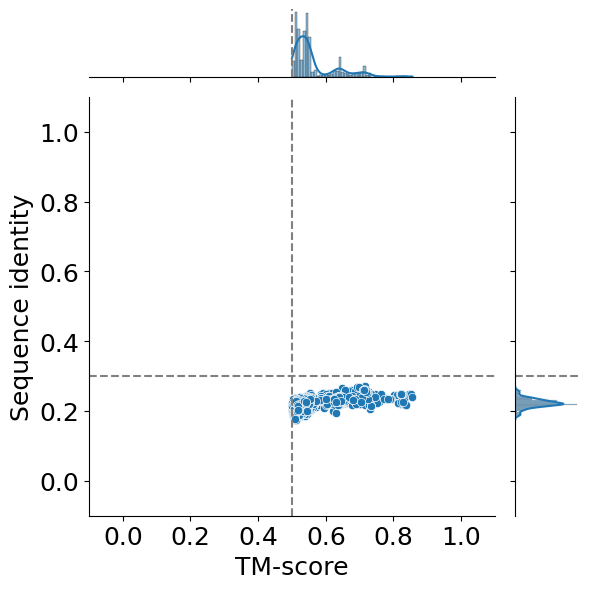

Statistics_result:
st1_se1_num=0/579
st1_se1_rate=0.0
st1_se0_num=1862/2138
st1_se0_rate=0.8709073900841908
st1_num=1862/2717
st1_rate=0.6853146853146853
---------------------------------------------


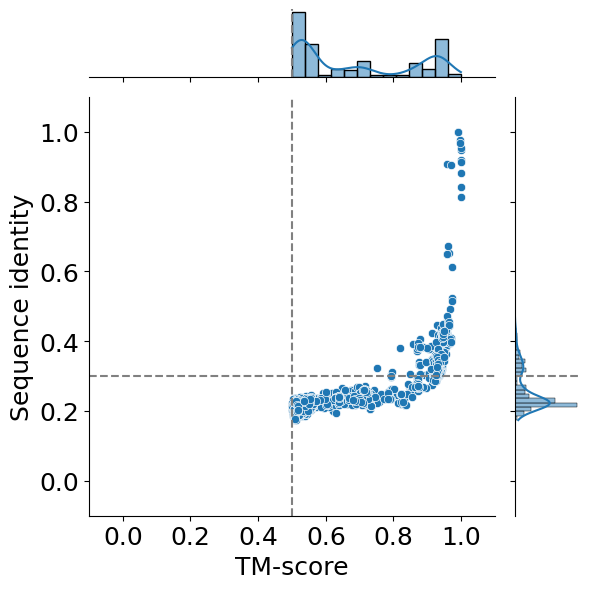

Statistics_result:
st1_se1_num=579/579
st1_se1_rate=1.0
st1_se0_num=1721/2138
st1_se0_rate=0.8049579045837231
st1_num=2300/2717
st1_rate=0.8465218991534781
---------------------------------------------


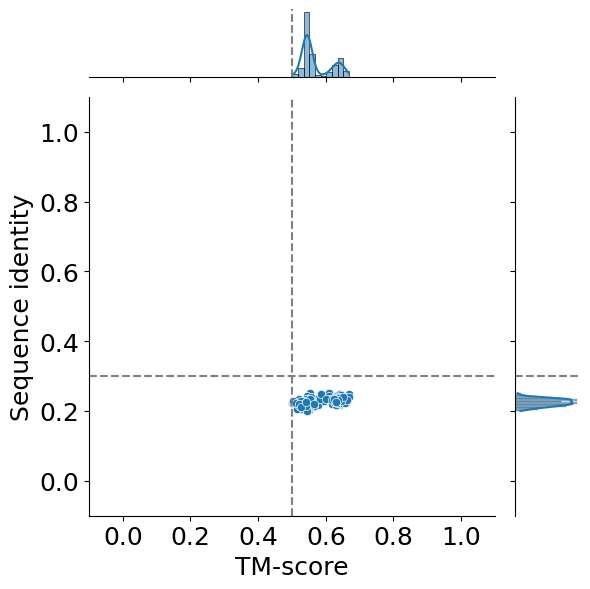

Statistics_result:
st1_se1_num=0/579
st1_se1_rate=0.0
st1_se0_num=417/2138
st1_se0_rate=0.1950420954162769
st1_num=417/2717
st1_rate=0.1534781008465219
---------------------------------------------


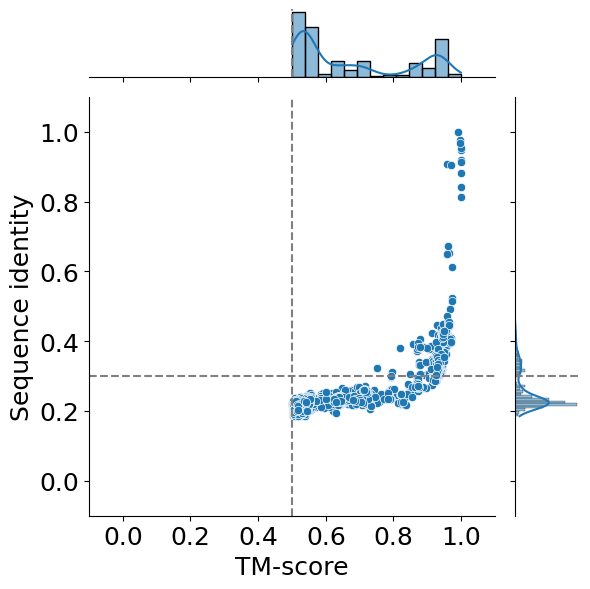

Statistics_result:
st1_se1_num=579/579
st1_se1_rate=1.0
st1_se0_num=2024/2138
st1_se0_rate=0.9466791393826005
st1_num=2603/2717
st1_rate=0.958041958041958
---------------------------------------------


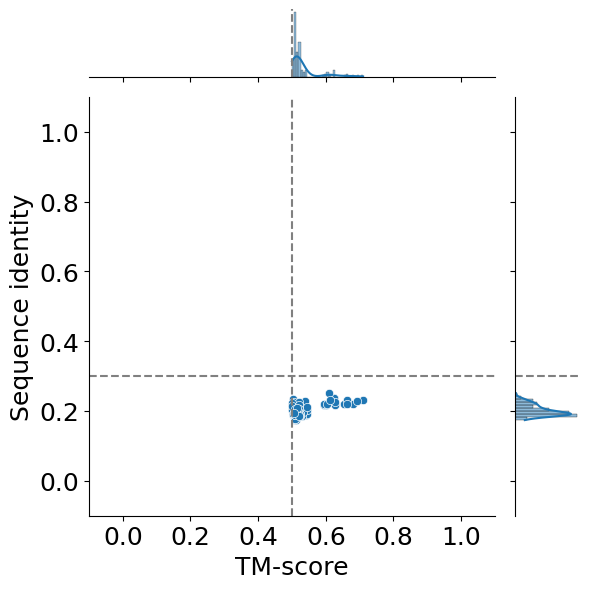

Statistics_result:
st1_se1_num=0/579
st1_se1_rate=0.0
st1_se0_num=114/2138
st1_se0_rate=0.05332086061739944
st1_num=114/2717
st1_rate=0.04195804195804196
---------------------------------------------


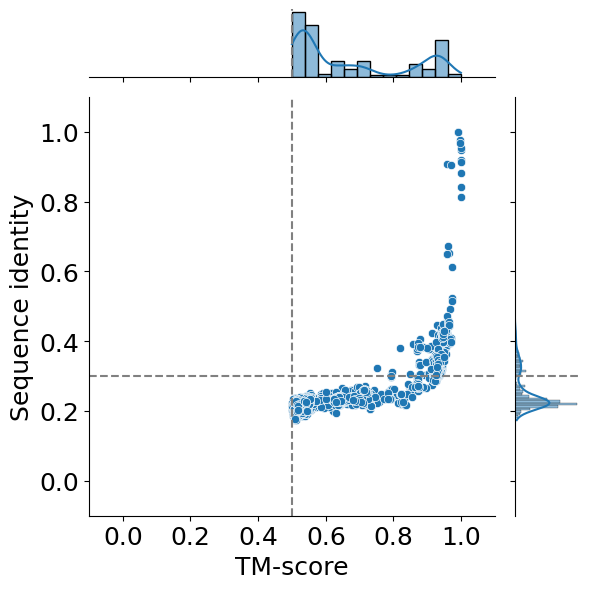

Statistics_result:
st1_se1_num=579/579
st1_se1_rate=1.0
st1_se0_num=2097/2138
st1_se0_rate=0.9808231992516371
st1_num=2676/2717
st1_rate=0.9849098270150902
---------------------------------------------


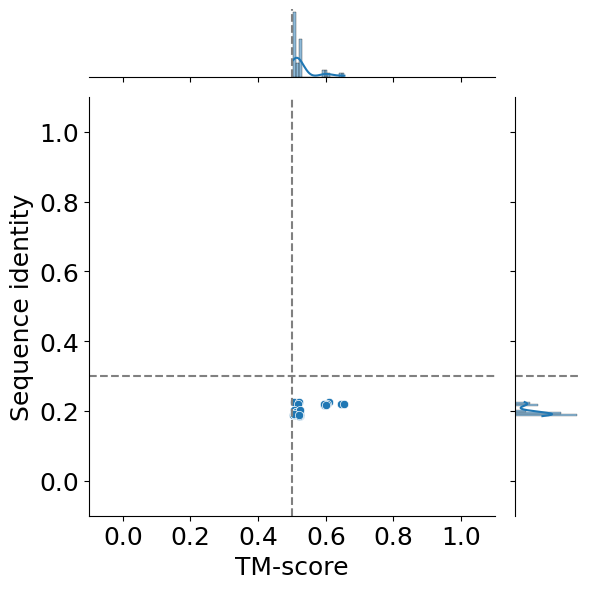

Statistics_result:
st1_se1_num=0/579
st1_se1_rate=0.0
st1_se0_num=41/2138
st1_se0_rate=0.019176800748362956
st1_num=41/2717
st1_rate=0.015090172984909826
---------------------------------------------


In [1]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, get_miss_wrong_statistics, pair_list_statistics

# Miss fault statistics(swissprot_to_swissprot, get & miss)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/prefilter_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/target_protein_list.txt"
result_path = './scientist_figures/swissprot_to_swissprot/get_miss/'
todo_name_list = [
    'mmseqs2',
    'foldseek',
    'ss_predictor',
    'plmsearch'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
top_list = ['all', 5506, 5506, 5506]
get_miss_wrong_statistics(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, top_list, result_path)

# Pair list statistics
pair_list_filename_list = []
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/get_mmseqs2.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/miss_mmseqs2.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/get_foldseek.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/miss_foldseek.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/get_ss_predictor.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/miss_ss_predictor.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/get_plmsearch.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot/get_miss/miss_plmsearch.txt")
for pair_list_filename in pair_list_filename_list:
    query_fasta_filename = "./plmsearch_data/swissprot_to_swissprot/query_protein.fasta"
    target_fasta_filename = "./plmsearch_data/swissprot_to_swissprot/target_protein.fasta"
    ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
    query_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/query_protein_list.txt"
    target_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/target_protein_list.txt"
    pair_list_statistics(pair_list_filename, query_fasta_filename, target_fasta_filename, query_protein_list_path, target_protein_list_path, ss_mat_path)

### (Supplement) Pfam Comparison between PfamFamily & PfamClan

Get prefilter list without self: 13025it [00:00, 109838.71it/s]


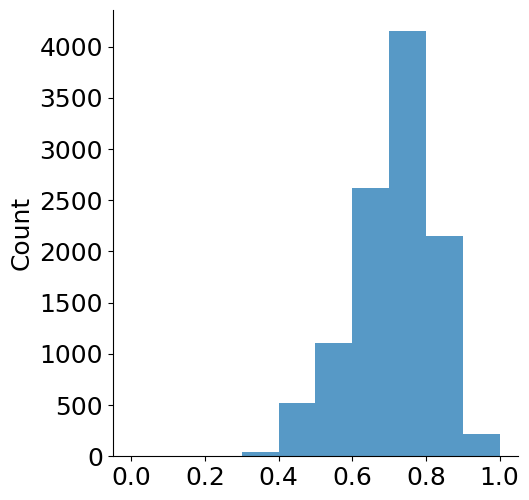

Get prefilter list without self: 142879it [00:01, 96517.88it/s]


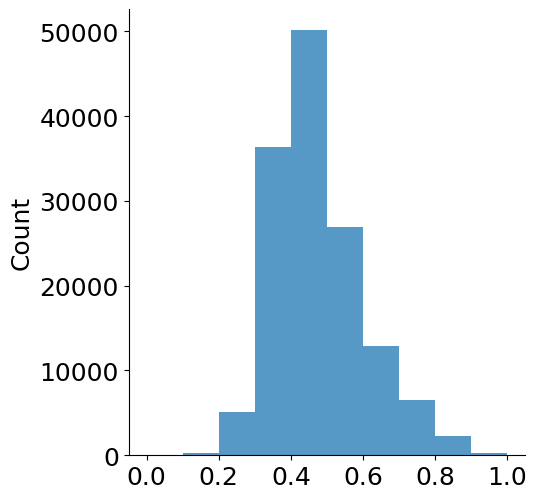

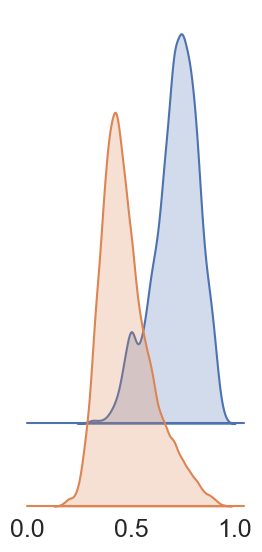

Get prefilter list without self: 1225it [00:00, 116614.22it/s]


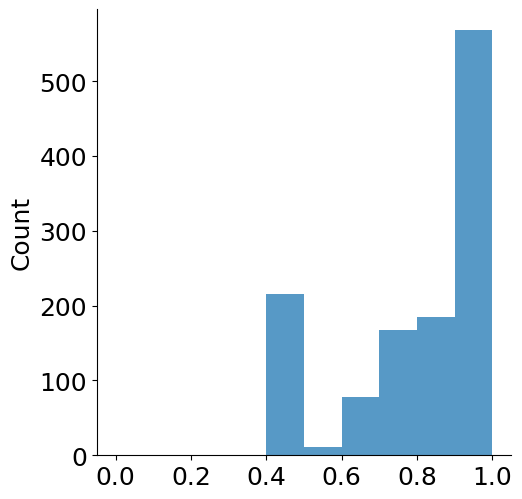

Get prefilter list without self: 19238it [00:00, 136811.91it/s]


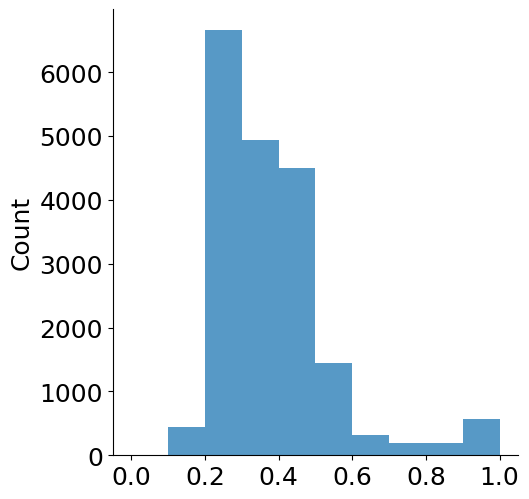

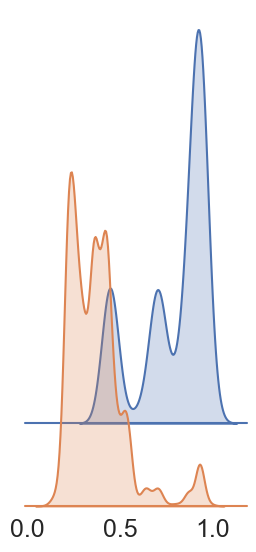

Get prefilter list without self: 15890it [00:00, 138593.70it/s]


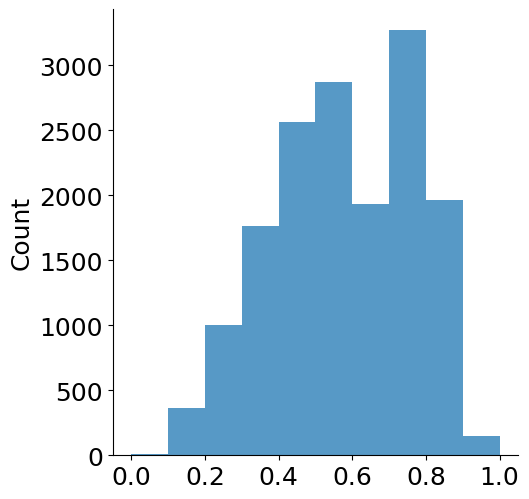

Get prefilter list without self: 211688it [00:01, 131891.11it/s]


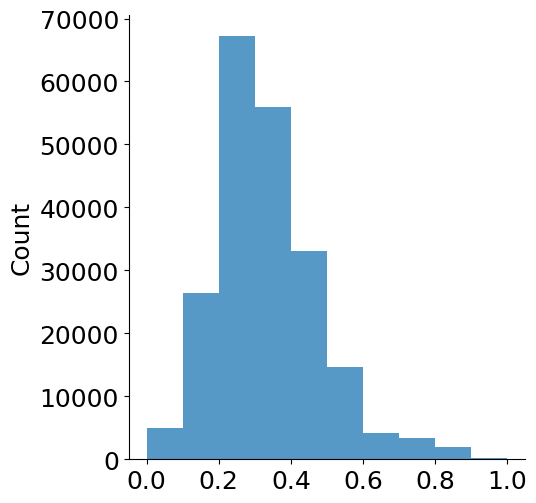

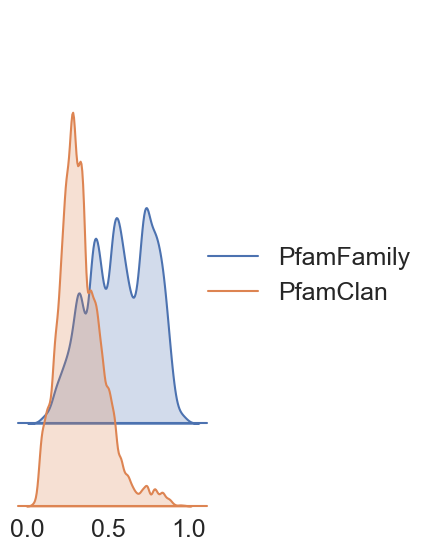

In [2]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import get_input_output, ss_mat_statistics

# Pfam Compare(scope)
todo_dir_list = ["./plmsearch_data/scope_test/prefilter_result/"]
ss_mat_path = "./plmsearch_data/scope_test/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/scope_test/protein_list.txt"
target_protein_list_path = "./plmsearch_data/scope_test/protein_list.txt"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
ss_mat_statistics(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, todo_fig_list, "./scientist_figures/pfam_scope_compare.png", method_list, top_list, legend=False)

# Pfam Compare(swissprot_to_swissprot)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/prefilter_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/swissprot_to_swissprot/target_protein_list.txt"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
ss_mat_statistics(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, todo_fig_list, "./scientist_figures/pfam_swissprot_to_swissprot_compare.png", method_list, top_list, legend=False)

# Pfam Compare(scope_to_swissprot)
todo_dir_list = ["./plmsearch_data/scope_to_swissprot/prefilter_result/"]
ss_mat_path = "./plmsearch_data/scope_to_swissprot/ss_mat.npy"
query_protein_list_path = "./plmsearch_data/scope_to_swissprot/query_protein_list.txt"
target_protein_list_path = "./plmsearch_data/scope_to_swissprot/target_protein_list.txt"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
ss_mat_statistics(ss_mat_path, query_protein_list_path, target_protein_list_path, todo_file_list, todo_fig_list, "./scientist_figures/pfam_scope_to_swissprot_compare.png", method_list, top_list, legend=True)


### Statistics of the number of proteins in protein families on SCOPe40-test, Swiss-Prot

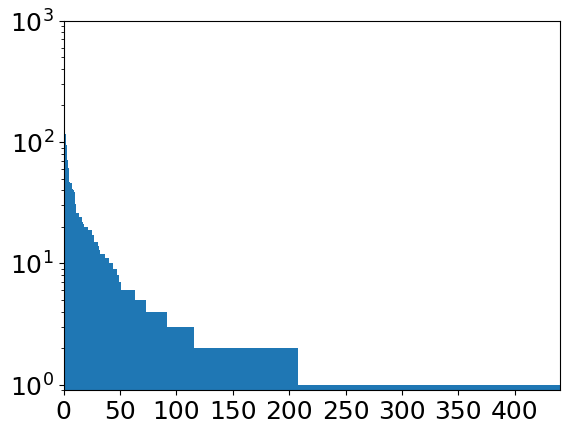

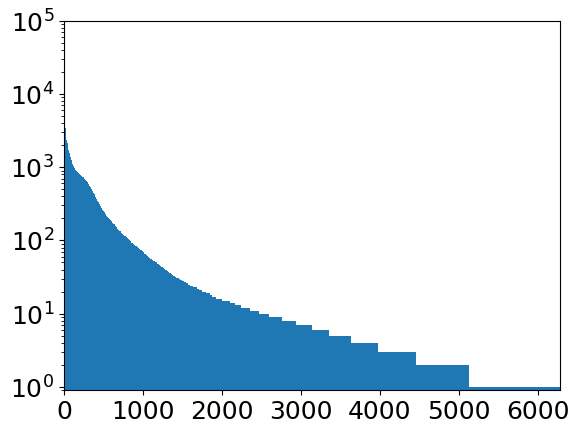

In [3]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import cluster_statistics

# Cluster statistics(scope test)
pfam_result = "./plmsearch_data/scope_test/pfam_result.json"
clan_file = './plmsearch_data/Pfam_db/Pfam-A.clans.tsv'
result_path = './scientist_figures/scope_test/'
cluster_statistics(pfam_result, clan_file, result_path)

# Cluster statistics(swissprot)
pfam_result = "./plmsearch_data/swissprot_to_swissprot/target_pfam_result.json"
clan_file = './plmsearch_data/Pfam_db/Pfam-A.clans.tsv'
result_path = './scientist_figures/swissprot_to_swissprot/'
cluster_statistics(pfam_result, clan_file, result_path)

### Avg. pLDDT statistics

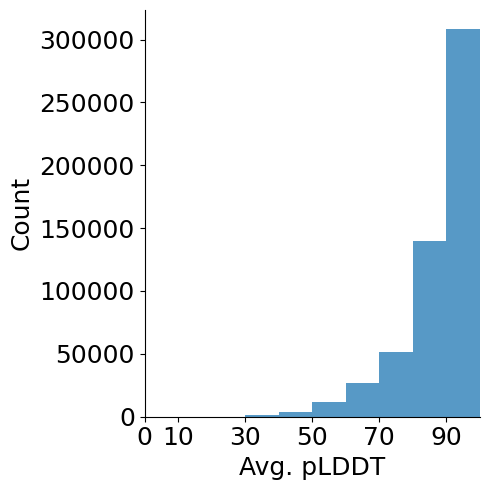

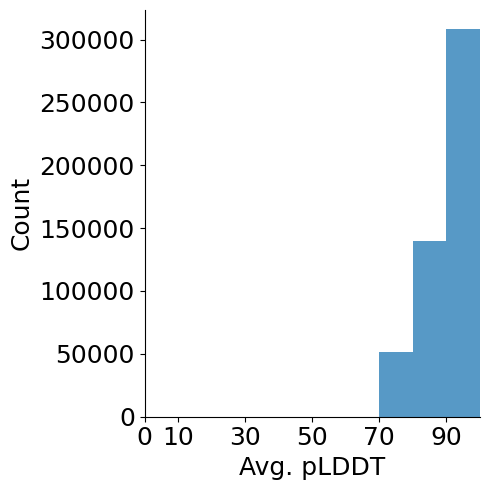

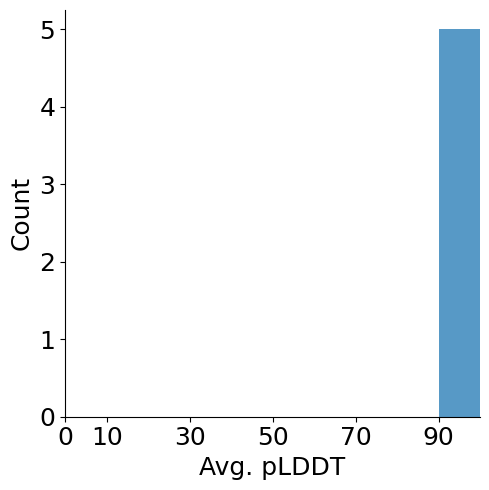

In [4]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import plddt_statistics

protein_list_path = "./scientist_figures/plddt_statistics/plddt/swissprot_plddt_statistics_raw_target.txt"
fig_name = './scientist_figures/plddt_statistics/swissprot_plddt_statistics_raw_target.png'
plddt_statistics(protein_list_path, fig_name)

protein_list_path = "./scientist_figures/plddt_statistics/plddt/swissprot_plddt_statistics_target.txt"
fig_name = './scientist_figures/plddt_statistics/swissprot_plddt_statistics_target.png'
plddt_statistics(protein_list_path, fig_name)

protein_list_path = "./scientist_figures/plddt_statistics/plddt/swissprot_plddt_statistics_query.txt"
fig_name = './scientist_figures/plddt_statistics/swissprot_plddt_statistics_query.png'
plddt_statistics(protein_list_path, fig_name)

### Reference similarity statistics

4870849it [01:01, 79555.22it/s] 


Same fold pairs = 190615
Different fold pairs = 4680234
P(Same fold) = 0.03913383477911141
P(Different fold) = 0.9608661652208886
Similarity = 0.2, Same Fold Posterior Probability = 0.0013174380896226418
Similarity = 0.2, Different Fold Posterior Probability = 0.9986825619103774
Similarity = 0.3, Same Fold Posterior Probability = 0.062303268507648064
Similarity = 0.3, Different Fold Posterior Probability = 0.9376967314923519
Similarity = 0.4, Same Fold Posterior Probability = 0.5267495878915031
Similarity = 0.4, Different Fold Posterior Probability = 0.47325041210849694
Similarity = 0.5, Same Fold Posterior Probability = 0.9746401644962304
Similarity = 0.5, Different Fold Posterior Probability = 0.025359835503769707
Similarity = 0.6, Same Fold Posterior Probability = 1.0
Similarity = 0.6, Different Fold Posterior Probability = 0.0


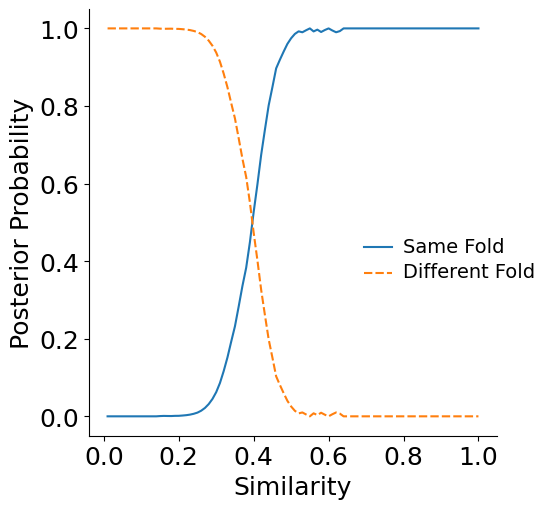

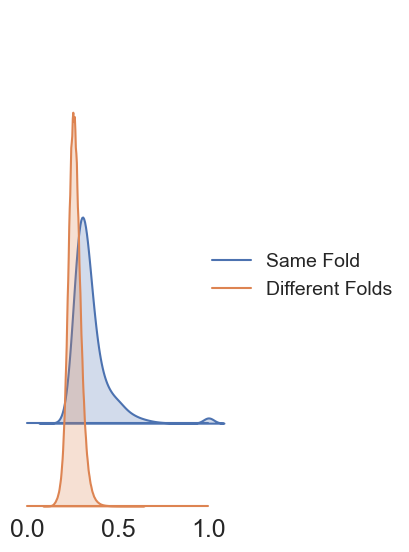

In [5]:
"""
Created on 2021/12/28
@author liuwei
"""
import sys
sys.path.append("./plmsearch/")
from plmsearch.plmsearch_util.statistics_util import scope_similarity_statistics

# Scope_similarity_statistics
similarity_file = "./plmsearch_data/scope_test/prefilter_result/ss_predictor"
fold_file = "./plmsearch_data/scope_test/scop_lookup.tsv"
plot_name = "./scientist_figures/scope_similarity_statistics"
scope_similarity_statistics(similarity_file, fold_file, plot_name)

### The area under the curve (AUC) of the cumulative ROC curve up to the first FP

In [6]:
%cd ./plmsearch_data/scope_test/
# Generate rocx
# Change "!/usr/bin/mawk" into "!/usr/bin/awk" in ./plmsearch_data/scope_test/bench.awk if mawk is unavailable
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/3dblastsw) > ./rocx/3dblastsw.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/clesw) > ./rocx/clesw.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/dalialn) > ./rocx/dalialn.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/cealn) > ./rocx/cealn.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/foldseek_default) > ./rocx/foldseek_default.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/foldseek) > ./rocx/foldseek.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/mmseqs2_default) > ./rocx/mmseqs2_default.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/mmseqs2) > ./rocx/mmseqs2.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/tmaln_default) > ./rocx/tmaln_default.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/tmaln_avg_score) > ./rocx/tmaln_avg_score.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/tmaln) > ./rocx/tmaln.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/tmaln_filter) > ./rocx/tmaln_filter.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/mse) > ./rocx/mse.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/cos) > ./rocx/cos.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/ss_predictor_without_cos) > ./rocx/ss_predictor_without_cos.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/ss_predictor) > ./rocx/ss_predictor.rocx
!./bench.awk ./scop_lookup.tsv <(cat ./prefilter_result/plmsearch) > ./rocx/plmsearch.rocx
# The area under the curve (AUC) of the cumulative ROC curve up to the first FP.
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/3dblastsw.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/clesw.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/dalialn.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/cealn.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/foldseek_default.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/foldseek.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/mmseqs2_default.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/mmseqs2.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/tmaln_default.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/tmaln_avg_score.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/tmaln.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/tmaln_filter.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/mse.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/cos.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/ss_predictor_without_cos.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/ss_predictor.rocx
!awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/plmsearch.rocx
%cd ../..

/home/lw/plmsearch/plmsearch_data/scope_test
0.653066 0.255024 0.0453962
0.672991 0.265721 0.033716
0.923185 0.702481 0.28161
0.847345 0.527171 0.148135
0.532912 0.170404 0.0150243
0.868998 0.531939 0.178067
0.157413 0.0216475 1.08648e-05
0.318421 0.0507028 0.00292006
0.859197 0.529836 0.158013
0.933349 0.711424 0.326272
0.9355 0.721375 0.346205
0.927819 0.827217 0.390952
0.69959 0.309579 0.0393793
0.704912 0.316091 0.0402022
0.864413 0.51609 0.113866
0.875829 0.529739 0.117999
0.910825 0.702454 0.276416
/home/lw/plmsearch


### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP

In [7]:
%cd ./plmsearch_data/scope_test/
# The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP.
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/3dblastsw.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/clesw.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/dalialn.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/cealn.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/foldseek.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/mmseqs2.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/tmaln.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/tmaln_filter.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/mse.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/cos.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/ss_predictor_without_cos.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/ss_predictor.rocx
!awk '{ FP+=$6; FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FP, FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/plmsearch.rocx
%cd ../..

/home/lw/plmsearch/plmsearch_data/scope_test
766 6.95567 8.92568 1.44459 17.3259
766 6.97784 9.65971 1.10691 17.7445
687 9.23338 33.6232 16.7445 59.601
766 8.70274 23.8292 8.7249 41.2568
765 8.42894 24.7627 11.5398 44.7314
763 2.206 0.516297 0.0247718 2.74707
766 9.29726 38.5776 24.8318 72.7066
298 9.15515 46.1851 38.8618 94.2021
766 6.88396 8.52151 1.70404 17.1095
766 6.95176 8.7601 1.76141 17.4733
766 8.84876 17.8149 5.53977 32.2034
766 8.86441 19.0469 5.89831 33.8096
298 9.27119 29.8188 17.9622 57.0522
/home/lw/plmsearch
